In [21]:
import numpy as np
import matplotlib.pyplot as plt

def hyp(theta, x):
    return theta[0] + theta[1] * x

def cost(theta, x, y):
    return np.sum((hyp(theta, x) - y) ** 2) / (2 * len(x))

def cost_deriv0(theta, x, y):
    return np.sum(hyp(theta, x) - y) / len(x)

def cost_deriv1(theta, x, y):
    return np.sum((hyp(theta, x) - y) * x) / len(x)

def grad_descent(theta, x, y, alpha):
    tmp0 = theta[0] - alpha * cost_deriv0(theta, x, y)
    tmp1 = theta[1] - alpha * cost_deriv1(theta, x, y)
    theta[0] = tmp0
    theta[1] = tmp1
    return theta

# This is the file where the data is stored.
file_in = 'coffee_data_messy.txt'

# Compute number of lines in file. Kinda sloppy but it works
with open(file_in, 'r') as f_in:
    for i, l in enumerate(f_in):
        pass
    len_file = i + 1

# Open the file

f_in = open(file_in, 'r')

# Set up the data storage. Also kinda sloppy, but it works
data = np.zeros((len_file - 2, 3), dtype = float)
details = f_in.readline()
columns = f_in.readline()
i = 0
for line in f_in:
    data[i, :] = [np.float(x) for x in line.replace('\n', '').split(' ')]
    i = i + 1

x = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]
y1_log = np.log(y1)
y2_log = np.log(y2)

theta1 = np.array([1, 1], dtype = float) # Initial guess for the line for y1
theta2 = np.array([1, 1], dtype = float) # initial guess for the line for y2
alpha = 0.002

for i in range(10000):
    theta1 = grad_descent(theta1, x, y1_log, alpha)
    theta2 = grad_descent(theta2, x, y2_log, alpha)

print(theta1)
print(theta2)
print(cost(theta1, x, y1_log))
print(cost(theta2, x, y2_log))

[ 4.32514001 -0.01513596]
[ 4.14906296 -0.01278474]
0.00058793841789
0.00041505232609


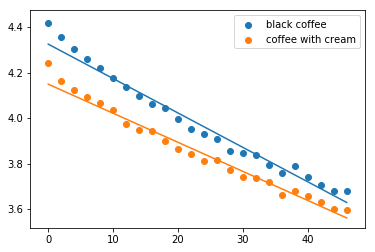

In [24]:
# Create a line for the regressions
y1_log_reg = theta1[0] + theta1[1]*x
y2_log_reg = theta2[0] + theta2[1]*x

plt.scatter(x, y1_log, label='black coffee')
plt.scatter(x, y2_log, label='coffee with cream')
plt.plot(x, y1_log_reg)
plt.plot(x, y2_log_reg)
plt.legend()
plt.show()

In [25]:
# The cooling constant for the black coffee is given by
print(np.abs(theta1[1]))

0.0151359568203


In [26]:
# and the cooling constant for coffee with cream is given by
print(np.abs(theta2[1]))

0.0127847392577
